In [50]:
import polars as pl
import tensorflow as tf
from tensorflow.keras import models, layers, datasets, utils, backend, optimizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as mlplot
import numpy as np
import random as rn

print(f"Running Tensorflow {tf.__version__}")

Running Tensorflow 2.19.0


In [51]:
#load Dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [52]:
print(x_train.shape)

(60000, 28, 28)


In [30]:
#Randomly select 8 examples and plot them
def plotExamples(data, labels, model_predict):
    # mlplot.figure(figsize(8,5))

    for i in range(8):
        sub = 241 + i
        ax = mlplot.subplot(sub)
        index = np.random.randint(0,data.shape[0])
        ax.set_title(f"num: {str(np.argmax(labels[index]))} , {str(np.argmax(model_predict[index]))}")
        im = np.reshape(data[index], (28,28))
        mlplot.imshow(im, cmap="gray")
    mlplot.show()
    

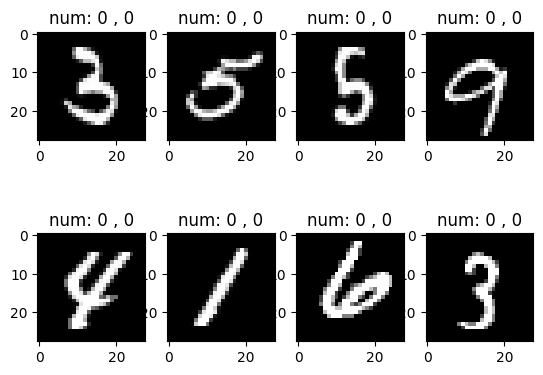

In [31]:
plotExamples(x_train, y_train, y_train)

In [32]:
backend.clear_session()
rn.seed(139)
np.random.seed(7)
tf.random.set_seed(13)

In [53]:
hw_model = models.Sequential()
hw_model.add(layers.Flatten(input_shape=(28,28)))
hw_model.add(layers.Dense(256,activation='sigmoid',name='Hidden_Layer1'))
hw_model.add(layers.Dense(128,activation='sigmoid',name='Hidden_Layer2'))
hw_model.add(layers.Dense(64,activation='relu',name='Hidden_Layer3'))
hw_model.add(layers.Dense(32,activation='relu',name='Hidden_Layer4'))
hw_model.add(layers.Dense(10,activation='softmax',name='Output_Layer'))

### Specify the hyperparameters and compile the model
- Use Stochastic gradient descent (SGD) as the Optimizer with `learning_rate` of `0.01`
- Use `Mean Squared Error` as the loss function

$$
\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where: 
( $y_i$ ) = Actual value

( $\hat{y}_i$ ) = Predicted value

( $n$ ) = Number of data points

## **Explanation**
- MSE measures how far the predictions are from the actual values.
- Squaring the errors ensures that large errors are penalized more than small ones.
- A **lower MSE** indicates a better model fit.

In [54]:
#Create SGD optimizer with learning rate `0.01`
sgd = optimizers.SGD(learning_rate=0.01)

#Compile the model, using MSE as loss function, SGD as optimizer
hw_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
hw_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer1 (Dense)                │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer4 (Dense)                │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
hw_model.fit(x=x_train, y=y_train, batch_size=64, epochs=15, verbose=2)

Epoch 1/15
938/938 - 3s - 4ms/step - accuracy: 0.1588 - loss: 2.2804
Epoch 2/15
938/938 - 3s - 3ms/step - accuracy: 0.3331 - loss: 2.1591
Epoch 3/15
938/938 - 3s - 3ms/step - accuracy: 0.5032 - loss: 1.5911
Epoch 4/15
938/938 - 3s - 3ms/step - accuracy: 0.6923 - loss: 0.9697
Epoch 5/15
938/938 - 3s - 3ms/step - accuracy: 0.7769 - loss: 0.7178
Epoch 6/15
938/938 - 3s - 3ms/step - accuracy: 0.8122 - loss: 0.6121
Epoch 7/15
938/938 - 3s - 3ms/step - accuracy: 0.8334 - loss: 0.5514
Epoch 8/15
938/938 - 3s - 3ms/step - accuracy: 0.8523 - loss: 0.4995
Epoch 9/15
938/938 - 3s - 3ms/step - accuracy: 0.8663 - loss: 0.4570
Epoch 10/15
938/938 - 3s - 3ms/step - accuracy: 0.8746 - loss: 0.4303
Epoch 11/15
938/938 - 3s - 3ms/step - accuracy: 0.8794 - loss: 0.4131
Epoch 12/15
938/938 - 3s - 3ms/step - accuracy: 0.8835 - loss: 0.4002
Epoch 13/15
938/938 - 3s - 3ms/step - accuracy: 0.8870 - loss: 0.3895
Epoch 14/15
938/938 - 3s - 3ms/step - accuracy: 0.8891 - loss: 0.3800
Epoch 15/15
938/938 - 3s - 3m

In [57]:
#Evaluate the model
hw_scores = hw_model.evaluate(x_test, y_test, verbose=0)
print(f"Model Accuracy: {hw_scores[1]*100:.2f}")

Model Accuracy: 89.85


In [58]:
hw_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


array([[1.6294146e-03, 8.7870811e-10, 5.5555638e-04, ..., 9.9276054e-01,
        4.8767010e-06, 1.5133986e-03],
       [2.0850175e-03, 6.4566411e-05, 9.6107221e-01, ..., 3.6558490e-09,
        1.8853225e-03, 3.8416706e-10],
       [2.8079528e-09, 9.7724402e-01, 7.3372186e-03, ..., 5.4047594e-04,
        1.4118456e-03, 4.5289678e-04],
       ...,
       [4.1746318e-07, 3.9220369e-05, 8.7030749e-06, ..., 5.3710031e-04,
        9.6180085e-03, 2.7059916e-01],
       [2.3503529e-03, 9.1342496e-05, 3.1143214e-04, ..., 9.0292588e-06,
        8.2720868e-02, 5.7780562e-04],
       [1.7838174e-05, 3.6378147e-09, 3.3224575e-04, ..., 4.1463191e-10,
        5.4356533e-06, 7.0309678e-09]], dtype=float32)